# Exploratory Data Analysis (EDA) - Job Hunt Dataset

This notebook provides comprehensive exploratory data analysis of the job dataset to understand:
- Data structure and quality
- Distribution of key features
- Missing values and data patterns
- Relationships between variables
- Insights for feature engineering


## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configure plotting
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the dataset
dataset_path = Path('./dataset/job_descriptions_100k_sample.csv')

try:
    df = pd.read_csv(dataset_path)
    print(f'✅ Dataset loaded successfully!')
    print(f'Shape: {df.shape}')
except FileNotFoundError:
    print('❌ Dataset not found. Creating sample data for demonstration...')
    # Create sample data if file doesn't exist
    np.random.seed(42)
    n_samples = 1000
    
    df = pd.DataFrame({
        'Role': np.random.choice(['Software Engineer', 'Data Scientist', 'Product Manager', 
                                 'DevOps Engineer', 'UI/UX Designer', 'Marketing Manager'], n_samples),
        'Job Title': np.random.choice(['Senior Developer', 'Junior Analyst', 'Lead Engineer',
                                      'Principal Scientist', 'Manager', 'Specialist'], n_samples),
        'Skills': np.random.choice(['Python, SQL, Machine Learning', 'Java, Spring, AWS',
                                   'React, JavaScript, Node.js', 'Tableau, Excel, SQL',
                                   'Figma, Sketch, Adobe Creative Suite'], n_samples),
        'Experience': np.random.choice(['0-2 years', '3-5 years', '5+ years', '2-4 years',
                                       'Entry level', 'Senior level', '10+ years'], n_samples),
        'Qualification': np.random.choice(['Bachelor\'s Degree', 'Master\'s Degree', 'PhD',
                                          'Bachelor of Science', 'Master of Arts', None], n_samples),
        'Salary': np.random.choice(['$50,000 - $70,000', '$80,000 - $120,000', '$60K+',
                                   '75000', '$100,000 - $150,000', None], n_samples),
        'Work Type': np.random.choice(['Full-time', 'Part-time', 'Contract', 'Internship',
                                      'Remote', 'Hybrid'], n_samples)
    })
    print(f'Sample dataset created with shape: {df.shape}')

✅ Dataset loaded successfully!
Shape: (100000, 23)


## 2. Dataset Overview

In [3]:
# Basic dataset information
print('=== DATASET OVERVIEW ===')
print(f'Dataset Shape: {df.shape}')
print(f'Number of Records: {len(df):,}')
print(f'Number of Features: {len(df.columns)}')
print(f'Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

print('\n=== COLUMN INFORMATION ===')
print(df.dtypes)

print('\n=== FIRST FEW ROWS ===')
df.head()

=== DATASET OVERVIEW ===
Dataset Shape: (100000, 23)
Number of Records: 100,000
Number of Features: 23
Memory Usage: 185.32 MB

=== COLUMN INFORMATION ===
Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

=== FIRST FEW ROWS ===


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,731217710221434,1 to 9 Years,B.Com,$59K-$105K,Bissau,Guinea-Bissau,11.8037,-15.1804,Intern,56276,2023-04-24,Male,Justin Turner,525.904.3659,IT Support Specialist,IT Systems Administrator,Jobs2Careers,IT Systems Administrators manage and maintain ...,"{'Casual Dress Code, Social and Recreational A...",Network administration System and server maint...,"Administer and maintain IT systems, servers, a...",Bharat Electronics Limited,"{""Sector"":""Electronics"",""Industry"":""Electronic..."
1,117274981913427,2 to 14 Years,M.Com,$61K-$106K,Palikir,"Micronesia, Fed. Sts.",7.4256,150.5508,Intern,73167,2022-03-21,Male,Sarah Davis,(235)305-5348x40620,Java Developer,Java Backend Developer,Jobs2Careers,Java Backend Developers specialize in building...,"{'Employee Assistance Programs (EAP), Tuition ...",Backend development RESTful APIs Database inte...,Develop server-side applications and APIs usin...,Autoliv,"{""Sector"":""Automotive"",""Industry"":""Motor Vehic..."
2,1223957703158372,5 to 11 Years,MBA,$58K-$121K,Mexico City,Mexico,23.6345,-102.5528,Intern,85065,2023-04-07,Male,Rachel Kim,+1-673-276-6953x56364,Digital Marketing Specialist,Email Marketing Specialist,Jobs2Careers,Email Marketing Specialists design and execute...,"{'Childcare Assistance, Paid Time Off (PTO), R...","Email marketing platforms (e.g., Mailchimp, Co...","Plan and execute email marketing campaigns, in...",Titan Company,"{""Sector"":""Consumer Goods"",""Industry"":""Jewelry..."
3,2820360512579168,4 to 8 Years,MCA,$62K-$102K,Apia,Samoa,-13.7590,-172.1046,Intern,78831,2023-03-18,Male,Susan Navarro,+1-912-629-7264x430,Physician Assistant,Surgical Physician Assistant,Jobs2Careers,"Assist surgeons in the operating room, perform...","{'Life and Disability Insurance, Stock Options...",Surgical procedures and techniques Operating r...,"Assist surgeons in the operating room, includi...",Adidas AG,"{""Sector"":""Apparel and Footwear"",""Industry"":""A..."
4,2675139962258067,0 to 14 Years,B.Tech,$59K-$83K,Antananarivo,Madagascar,-18.8792,46.8451,Intern,55698,2022-04-05,Male,Darrell Freeman,389.243.9156x241,Data Engineer,ETL Developer,Jobs2Careers,An ETL Developer specializes in designing and ...,"{'Transportation Benefits, Professional Develo...","ETL (Extract, Transform, Load) processes Data ...","Extract, transform, and load (ETL) data from v...",Devon Energy,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."


In [4]:
# Statistical summary
print('=== STATISTICAL SUMMARY ===')
df.describe(include='all')

=== STATISTICAL SUMMARY ===


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
count,1.000000e+05,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000,100000.000000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99687
unique,NaN,48,10,561,214,216,NaN,NaN,5,NaN,731,3,69101,99994,147,376,16,376,11,376,375,888,884
top,NaN,1 to 10 Years,B.Tech,$60K-$110K,Seoul,Sint Maarten (Dutch part),NaN,NaN,Part-Time,NaN,2023-08-13,Male,Michael Smith,994-932-9528,UX/UI Designer,Interaction Designer,FlexJobs,Interaction Designers specialize in designing ...,"{'Life and Disability Insurance, Stock Options...",Interaction design principles User behavior an...,"Work on interaction design, defining how users...",HP,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
freq,NaN,2195,10149,219,938,516,NaN,NaN,20055,NaN,177,33363,60,2,2916,1274,8045,1274,10103,1274,1274,146,225
mean,1.544775e+15,NaN,NaN,NaN,NaN,NaN,19.397153,16.471635,NaN,73740.409300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.966554e+14,NaN,NaN,NaN,NaN,NaN,23.534421,70.850913,NaN,35324.292465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.169673e+11,NaN,NaN,NaN,NaN,NaN,-40.900600,-175.198200,NaN,12648.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.645562e+14,NaN,NaN,NaN,NaN,NaN,5.152100,-15.310100,NaN,43160.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.541538e+15,NaN,NaN,NaN,NaN,NaN,18.070800,19.374400,NaN,73686.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.325867e+15,NaN,NaN,NaN,NaN,NaN,39.399900,48.516400,NaN,104321.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Missing Values Analysis

=== MISSING VALUES ANALYSIS ===
                            Column  Missing_Count  Missing_Percentage
Company Profile    Company Profile            313               0.313
Experience              Experience              0               0.000
Job Id                      Job Id              0               0.000
Salary Range          Salary Range              0               0.000
location                  location              0               0.000
Country                    Country              0               0.000
Qualifications      Qualifications              0               0.000
latitude                  latitude              0               0.000
longitude                longitude              0               0.000
Company Size          Company Size              0               0.000
Work Type                Work Type              0               0.000
Preference              Preference              0               0.000
Contact Person      Contact Person              0         

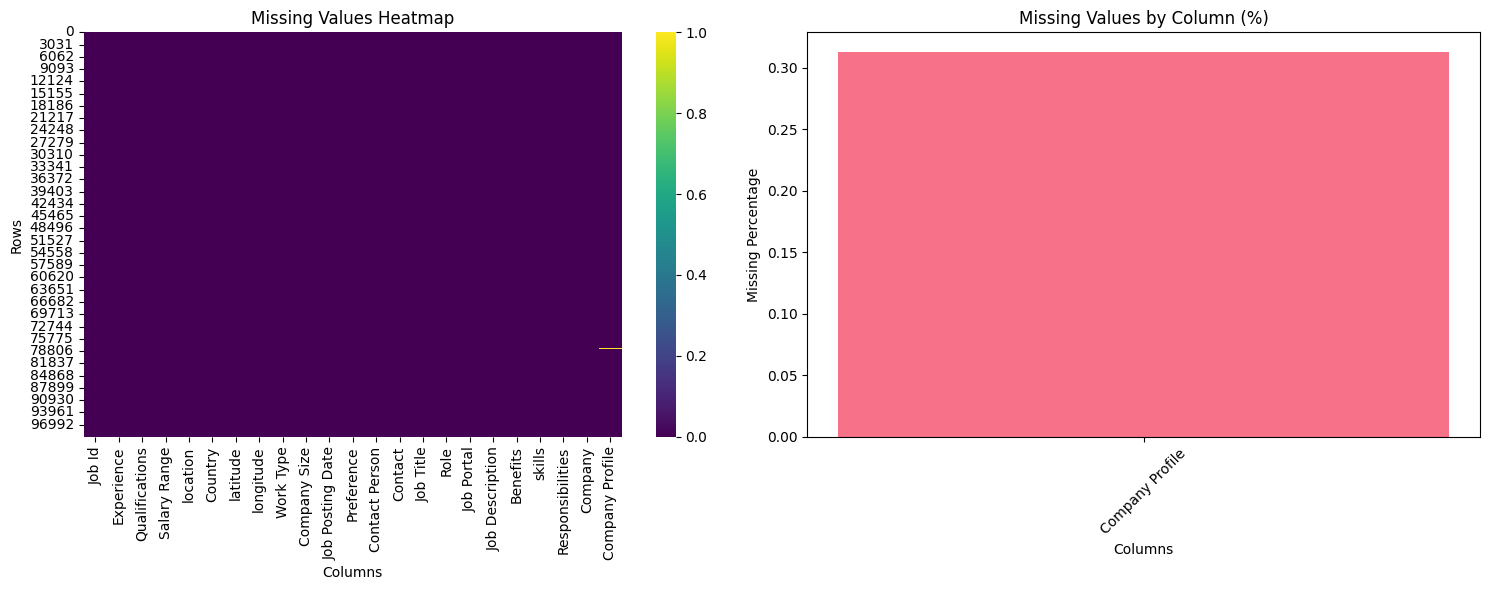

In [5]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

print('=== MISSING VALUES ANALYSIS ===')
print(missing_data)

# Visualize missing values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=True, ax=ax1, cmap='viridis')
ax1.set_title('Missing Values Heatmap')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Rows')

# Missing values bar plot
missing_data_plot = missing_data[missing_data['Missing_Percentage'] > 0]
if not missing_data_plot.empty:
    ax2.bar(missing_data_plot['Column'], missing_data_plot['Missing_Percentage'])
    ax2.set_title('Missing Values by Column (%)')
    ax2.set_xlabel('Columns')
    ax2.set_ylabel('Missing Percentage')
    ax2.tick_params(axis='x', rotation=45)
else:
    ax2.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Missing Values by Column')

plt.tight_layout()
plt.show()

## 4. Categorical Features Analysis

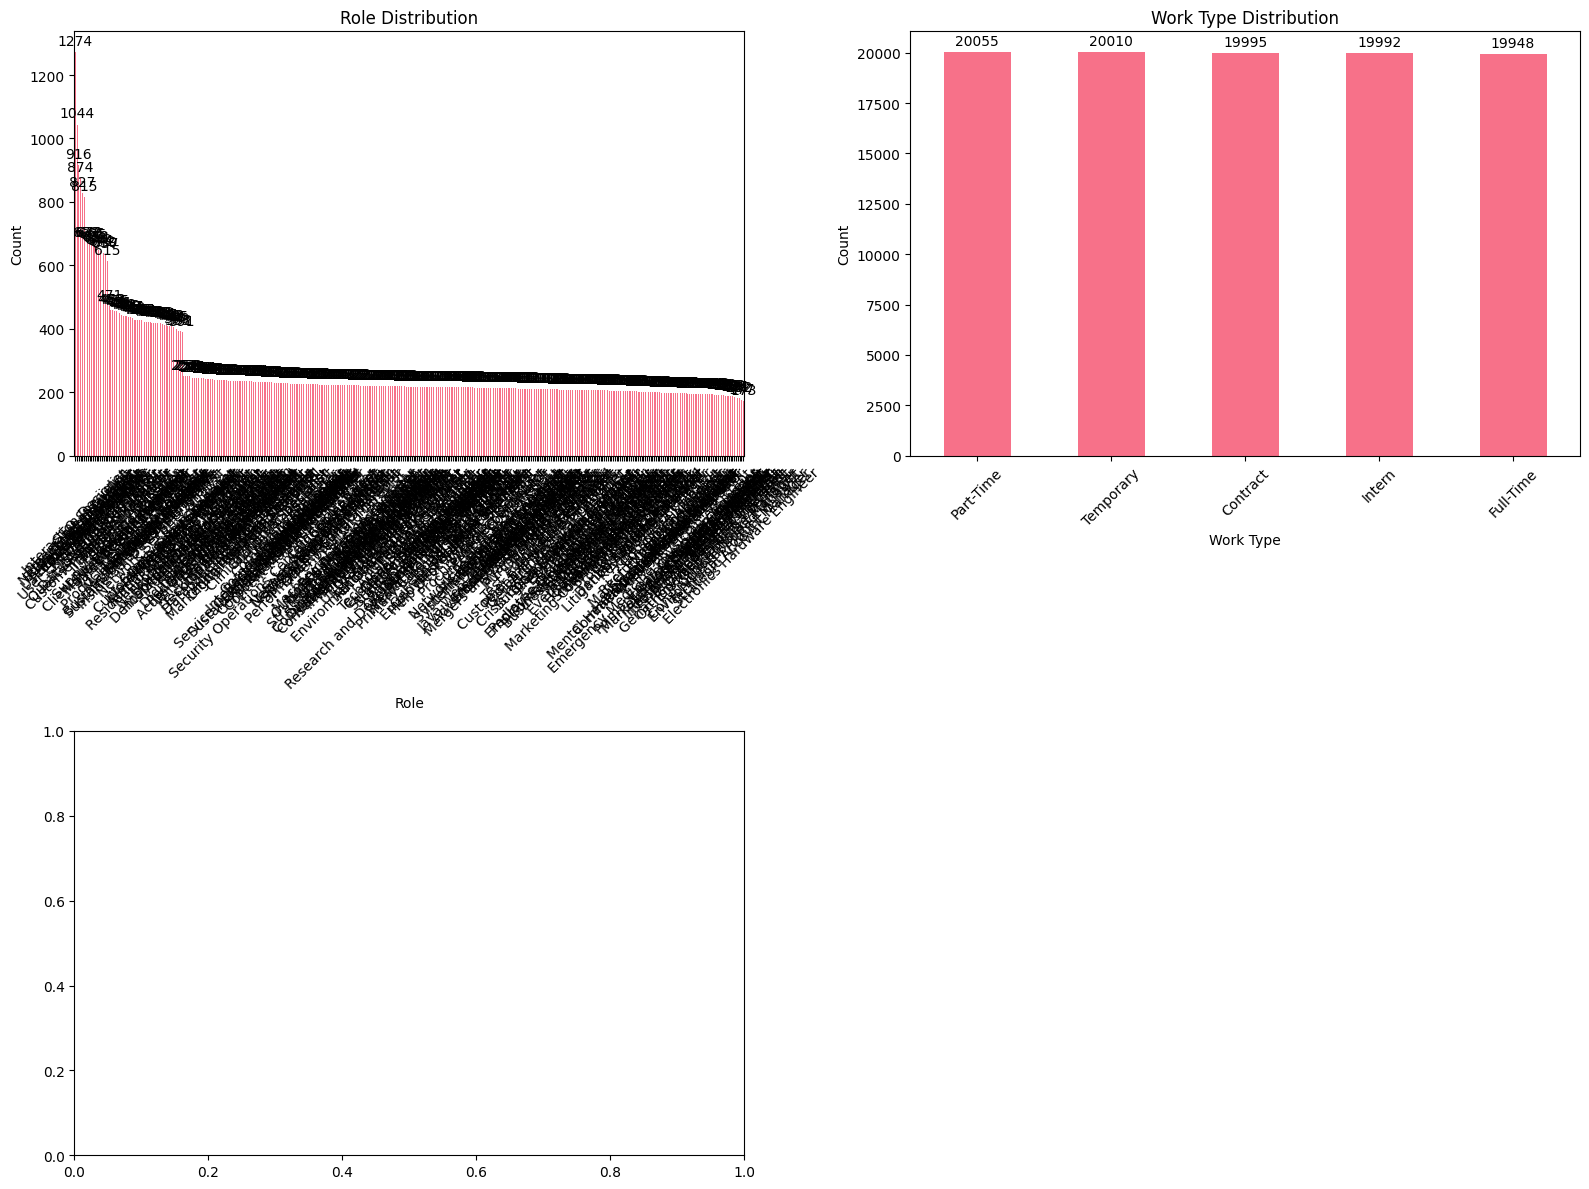

=== CATEGORICAL FEATURES STATISTICS ===

Role:
  Unique values: 376
  Most common: Interaction Designer
  Value counts:
Role
Interaction Designer       1274
Network Administrator      1044
Procurement Analyst         916
Social Media Manager        874
User Interface Designer     827
Name: count, dtype: int64

Work Type:
  Unique values: 5
  Most common: Part-Time
  Value counts:
Work Type
Part-Time    20055
Temporary    20010
Contract     19995
Intern       19992
Full-Time    19948
Name: count, dtype: int64


In [6]:
# Analyze categorical columns
categorical_cols = ['Role', 'Work Type', 'Qualification']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        # Value counts
        value_counts = df[col].value_counts()
        
        # Plot
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + max(value_counts.values) * 0.01, str(v), 
                        ha='center', va='bottom')

# Remove empty subplot
if len(categorical_cols) < 4:
    fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

# Print detailed statistics
print('=== CATEGORICAL FEATURES STATISTICS ===')
for col in categorical_cols:
    if col in df.columns:
        print(f'\n{col}:')
        print(f'  Unique values: {df[col].nunique()}')
        print(f'  Most common: {df[col].mode().iloc[0] if not df[col].mode().empty else "N/A"}')
        print(f'  Value counts:')
        print(df[col].value_counts().head())

## 5. Text Features Analysis

In [7]:
# Analyze text columns
text_cols = ['Job Title', 'Skills', 'Experience', 'Salary']

print('=== TEXT FEATURES ANALYSIS ===')

for col in text_cols:
    if col in df.columns:
        print(f'\n--- {col} ---')
        
        # Basic statistics
        non_null_data = df[col].dropna().astype(str)
        
        if len(non_null_data) > 0:
            text_lengths = non_null_data.str.len()
            word_counts = non_null_data.str.split().str.len()
            
            print(f'  Non-null entries: {len(non_null_data)}')
            print(f'  Unique values: {non_null_data.nunique()}')
            print(f'  Avg text length: {text_lengths.mean():.1f} characters')
            print(f'  Avg word count: {word_counts.mean():.1f} words')
            print(f'  Max text length: {text_lengths.max()} characters')
            print(f'  Min text length: {text_lengths.min()} characters')
            
            # Sample values
            print(f'  Sample values:')
            for sample in non_null_data.sample(min(3, len(non_null_data))).values:
                print(f'    - {sample}')
        else:
            print(f'  No non-null data available')

=== TEXT FEATURES ANALYSIS ===

--- Job Title ---
  Non-null entries: 100000
  Unique values: 147
  Avg text length: 17.3 characters
  Avg word count: 2.1 words
  Max text length: 35 characters
  Min text length: 7 characters
  Sample values:
    - Research Scientist
    - Software Engineer
    - Email Marketing Specialist

--- Experience ---
  Non-null entries: 100000
  Unique values: 48
  Avg text length: 12.7 characters
  Avg word count: 4.0 words
  Max text length: 13 characters
  Min text length: 12 characters
  Sample values:
    - 1 to 14 Years
    - 2 to 13 Years
    - 4 to 9 Years


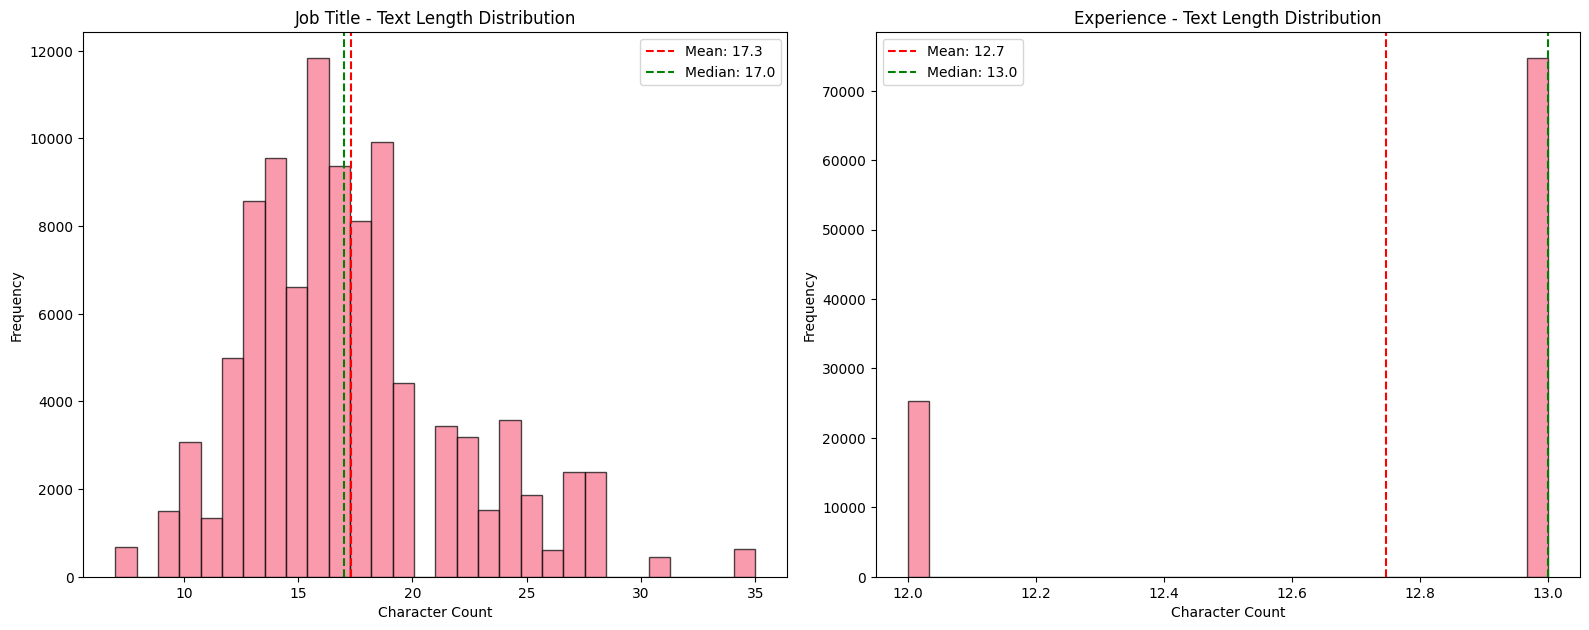

In [8]:
# Text length distributions
text_cols_available = [col for col in text_cols if col in df.columns]

if text_cols_available:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for i, col in enumerate(text_cols_available[:4]):
        non_null_data = df[col].dropna().astype(str)
        
        if len(non_null_data) > 0:
            text_lengths = non_null_data.str.len()
            
            # Histogram
            axes[i].hist(text_lengths, bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{col} - Text Length Distribution')
            axes[i].set_xlabel('Character Count')
            axes[i].set_ylabel('Frequency')
            
            # Add statistics
            axes[i].axvline(text_lengths.mean(), color='red', linestyle='--', 
                           label=f'Mean: {text_lengths.mean():.1f}')
            axes[i].axvline(text_lengths.median(), color='green', linestyle='--', 
                           label=f'Median: {text_lengths.median():.1f}')
            axes[i].legend()
    
    # Remove empty subplots
    for j in range(len(text_cols_available), 4):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

## 6. Experience and Salary Analysis

=== EXPERIENCE ANALYSIS ===
Experience Distribution:
Experience
1 to 10 Years    2195
0 to 8 Years     2166
1 to 11 Years    2154
5 to 8 Years     2149
2 to 13 Years    2147
0 to 15 Years    2144
2 to 8 Years     2140
5 to 13 Years    2137
2 to 9 Years     2137
3 to 11 Years    2124
2 to 14 Years    2123
0 to 9 Years     2123
4 to 9 Years     2116
3 to 8 Years     2115
5 to 11 Years    2113
1 to 9 Years     2108
4 to 15 Years    2107
4 to 13 Years    2105
3 to 15 Years    2105
4 to 10 Years    2102
5 to 12 Years    2101
3 to 13 Years    2099
4 to 8 Years     2089
4 to 14 Years    2088
3 to 9 Years     2086
4 to 12 Years    2085
4 to 11 Years    2081
5 to 15 Years    2077
3 to 10 Years    2074
3 to 12 Years    2067
0 to 10 Years    2066
0 to 12 Years    2065
1 to 13 Years    2065
0 to 11 Years    2055
2 to 15 Years    2053
0 to 13 Years    2044
1 to 8 Years     2041
0 to 14 Years    2038
1 to 14 Years    2034
3 to 14 Years    2034
1 to 12 Years    2031
2 to 12 Years    2029
5 to 14 Year

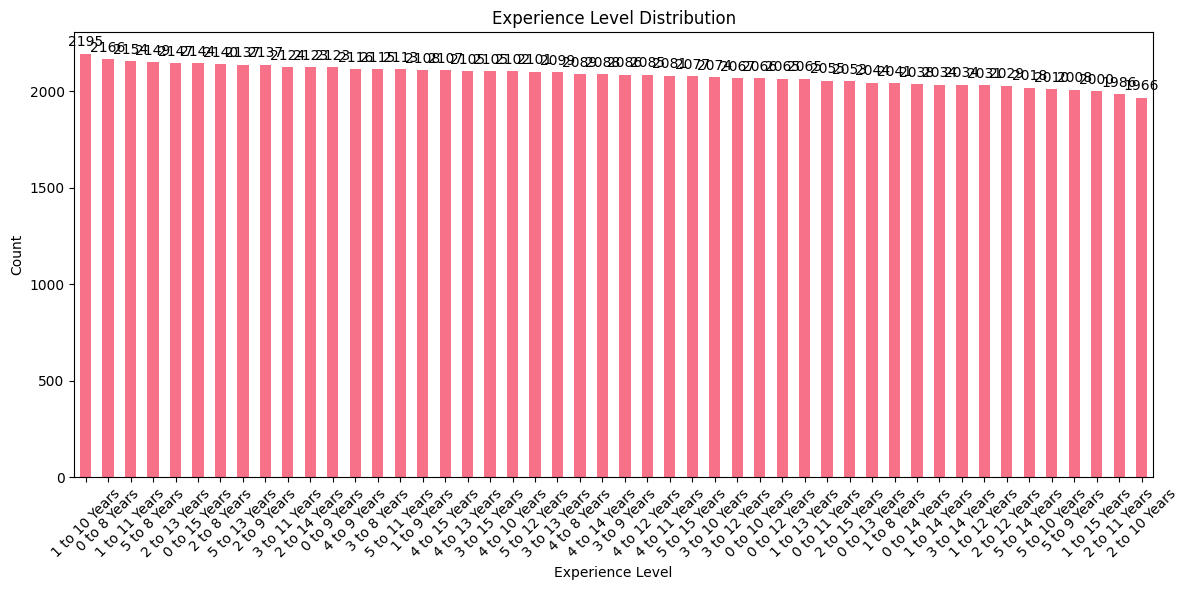

In [9]:
# Experience analysis
if 'Experience' in df.columns:
    print('=== EXPERIENCE ANALYSIS ===')
    
    exp_counts = df['Experience'].value_counts()
    print('Experience Distribution:')
    print(exp_counts)
    
    # Plot experience distribution
    plt.figure(figsize=(12, 6))
    exp_counts.plot(kind='bar')
    plt.title('Experience Level Distribution')
    plt.xlabel('Experience Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add value labels
    for i, v in enumerate(exp_counts.values):
        plt.text(i, v + max(exp_counts.values) * 0.01, str(v), 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Salary analysis
if 'Salary' in df.columns:
    print('\n=== SALARY ANALYSIS ===')
    
    salary_counts = df['Salary'].value_counts()
    print('Salary Distribution:')
    print(salary_counts)
    
    # Plot salary distribution
    plt.figure(figsize=(12, 6))
    salary_counts.plot(kind='bar')
    plt.title('Salary Range Distribution')
    plt.xlabel('Salary Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add value labels
    for i, v in enumerate(salary_counts.values):
        plt.text(i, v + max(salary_counts.values) * 0.01, str(v), 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

## 7. Relationships and Correlations

=== RELATIONSHIPS ANALYSIS ===
Role vs Work Type:
Work Type                  Contract  Full-Time  Intern  Part-Time  Temporary
Role                                                                        
API Developer                    40         41      39         44         52
Accessibility Developer          44         38      42         45         36
Account Executive               102         68      91         70         93
Account Manager                  48         53      38         40         47
Account Strategist               52         47      42         37         53
...                             ...        ...     ...        ...        ...
Wedding Consultant               48         54      61         38         44
Wedding Coordinator              37         46      36         40         30
Wedding Designer                 47         52      39         36         40
Wedding Planner                  64         85      80         93         87
Wireless Network Engineer 

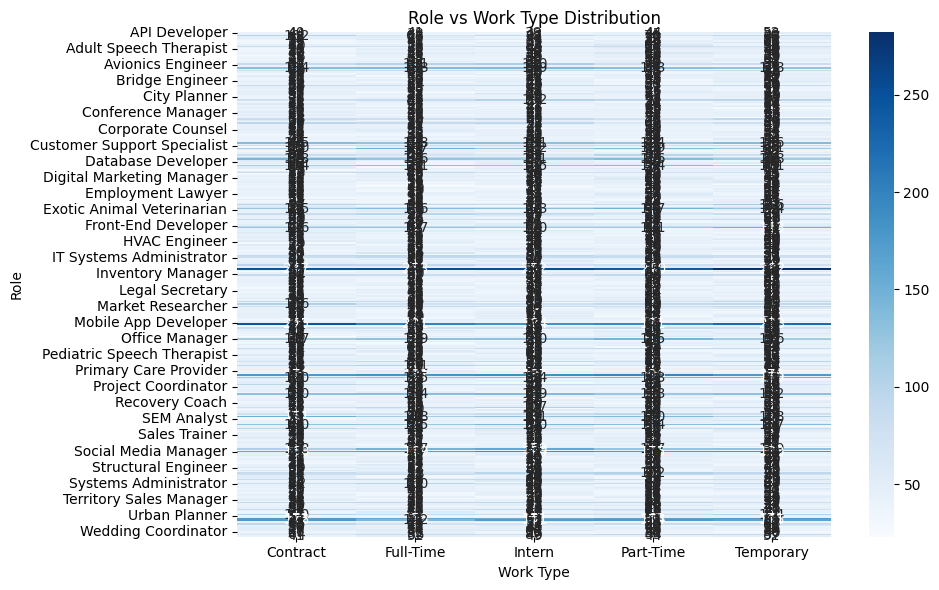


Role vs Experience:
Experience                 0 to 10 Years  0 to 11 Years  0 to 12 Years  \
Role                                                                     
API Developer                          6              5              3   
Accessibility Developer                2              3              9   
Account Executive                     16             12              4   
Account Manager                        6              6              3   
Account Strategist                     6              4              3   
...                                  ...            ...            ...   
Wedding Consultant                     4              2              5   
Wedding Coordinator                    5              3              1   
Wedding Designer                       2              2              4   
Wedding Planner                        7             14              8   
Wireless Network Engineer              9              5              2   

Experience      

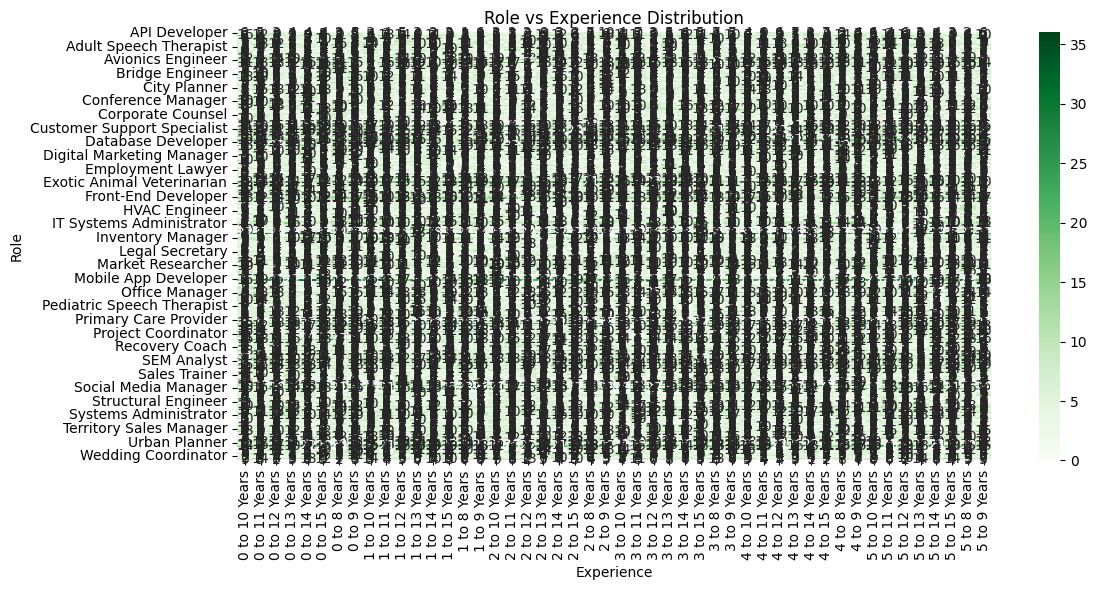

In [10]:
# Cross-tabulation analysis
print('=== RELATIONSHIPS ANALYSIS ===')

# Role vs Work Type
if 'Role' in df.columns and 'Work Type' in df.columns:
    print('Role vs Work Type:')
    role_worktype = pd.crosstab(df['Role'], df['Work Type'])
    print(role_worktype)
    
    # Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(role_worktype, annot=True, fmt='d', cmap='Blues')
    plt.title('Role vs Work Type Distribution')
    plt.tight_layout()
    plt.show()

# Role vs Experience
if 'Role' in df.columns and 'Experience' in df.columns:
    print('\nRole vs Experience:')
    role_exp = pd.crosstab(df['Role'], df['Experience'])
    print(role_exp)
    
    # Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(role_exp, annot=True, fmt='d', cmap='Greens')
    plt.title('Role vs Experience Distribution')
    plt.tight_layout()
    plt.show()

# Qualification vs Role
if 'Qualification' in df.columns and 'Role' in df.columns:
    print('\nQualification vs Role:')
    qual_role = pd.crosstab(df['Qualification'], df['Role'])
    print(qual_role)
    
    # Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(qual_role, annot=True, fmt='d', cmap='Oranges')
    plt.title('Qualification vs Role Distribution')
    plt.tight_layout()
    plt.show()

## 8. Data Quality Assessment

In [12]:
# Data quality assessment
print('=== DATA QUALITY ASSESSMENT ===')

quality_report = {}

for col in df.columns:
    col_data = df[col]
    
    quality_report[col] = {
        'total_records': len(col_data),
        'missing_count': col_data.isnull().sum(),
        'missing_percentage': (col_data.isnull().sum() / len(col_data)) * 100,
        'unique_values': col_data.nunique(),
        'data_type': str(col_data.dtype)
    }
    
    # Additional checks for text columns
    if col_data.dtype == 'object':
        non_null_data = col_data.dropna().astype(str)
        if len(non_null_data) > 0:
            quality_report[col]['avg_text_length'] = non_null_data.str.len().mean()
            quality_report[col]['empty_strings'] = (non_null_data == '').sum()
            quality_report[col]['whitespace_only'] = non_null_data.str.strip().eq('').sum()

# Convert to DataFrame for better display
quality_df = pd.DataFrame(quality_report).T
print(quality_df)

# Identify potential issues
print('\n=== POTENTIAL DATA ISSUES ===')

issues_found = False

for col in df.columns:
    issues = []
    
    # High missing percentage
    if quality_report[col]['missing_percentage'] > 20:
        issues.append(f"High missing data: {quality_report[col]['missing_percentage']:.1f}%")
    
    # Low unique values (potential data quality issue)
    if quality_report[col]['unique_values'] == 1 and quality_report[col]['missing_count'] < len(df):
        issues.append("Only one unique value")
    
    # Empty strings or whitespace-only for text columns
    if 'empty_strings' in quality_report[col] and quality_report[col]['empty_strings'] > 0:
        issues.append(f"Empty strings: {quality_report[col]['empty_strings']}")
    
    if 'whitespace_only' in quality_report[col] and quality_report[col]['whitespace_only'] > 0:
        issues.append(f"Whitespace-only entries: {quality_report[col]['whitespace_only']}")
    
    if issues:
        print(f'{col}: {", ".join(issues)}')
        issues_found = True

if not issues_found:
    print('No major data quality issues detected! ✅')

=== DATA QUALITY ASSESSMENT ===
                 total_records missing_count missing_percentage unique_values  \
Job Id                  100000             0                0.0         99994   
Experience              100000             0                0.0            48   
Qualifications          100000             0                0.0            10   
Salary Range            100000             0                0.0           561   
location                100000             0                0.0           214   
Country                 100000             0                0.0           216   
latitude                100000             0                0.0           216   
longitude               100000             0                0.0           216   
Work Type               100000             0                0.0             5   
Company Size            100000             0                0.0         68401   
Job Posting Date        100000             0                0.0           731

## 9. Feature Engineering Insights

In [13]:
# Feature engineering insights and recommendations
print('=== FEATURE ENGINEERING INSIGHTS ===')

insights = []

# Qualification insights
if 'Qualification' in df.columns:
    qual_missing = df['Qualification'].isnull().sum()
    if qual_missing > 0:
        insights.append(f"📚 Qualification: {qual_missing} missing values - consider 'Other' category")
    
    qual_unique = df['Qualification'].nunique()
    insights.append(f"📚 Qualification: {qual_unique} unique values - good for classification")

# Experience insights
if 'Experience' in df.columns:
    exp_patterns = df['Experience'].value_counts()
    insights.append(f"💼 Experience: Various formats detected - standardization needed")
    insights.append(f"💼 Experience: Can create level categories (entry/mid/senior)")

# Salary insights
if 'Salary' in df.columns:
    salary_missing = df['Salary'].isnull().sum()
    if salary_missing > 0:
        insights.append(f"💰 Salary: {salary_missing} missing values - consider imputation")
    
    insights.append(f"💰 Salary: Range formats detected - extract min/max/mid values")

# Work Type insights
if 'Work Type' in df.columns:
    wt_unique = df['Work Type'].nunique()
    insights.append(f"🏢 Work Type: {wt_unique} categories - good for one-hot encoding")

# Text insights
text_cols_present = [col for col in ['Job Title', 'Skills', 'Role'] if col in df.columns]
if text_cols_present:
    insights.append(f"📝 Text Features: {len(text_cols_present)} text columns - combine for NLP features")
    insights.append(f"📝 Text Features: Extract technical terms, word counts, etc.")

# Print insights
for insight in insights:
    print(insight)

print('\n=== RECOMMENDED FEATURE ENGINEERING STEPS ===')
recommendations = [
    "1. 🔧 Qualification Classification: Standardize to Bachelor/Master/PhD/Other",
    "2. 🔧 Experience Parsing: Extract numeric ranges and create level indicators",
    "3. 🔧 Salary Processing: Parse ranges, extract min/max/mid values",
    "4. 🔧 Work Type Standardization: Create binary indicators for each type",
    "5. 🔧 Text Combination: Merge role, title, skills into unified text features",
    "6. 🔧 Missing Value Handling: Create 'has_data' indicators for quality tracking",
    "7. 🔧 Feature Scaling: Normalize numerical features for ML compatibility"
]

for rec in recommendations:
    print(rec)

=== FEATURE ENGINEERING INSIGHTS ===
💼 Experience: Various formats detected - standardization needed
💼 Experience: Can create level categories (entry/mid/senior)
🏢 Work Type: 5 categories - good for one-hot encoding
📝 Text Features: 2 text columns - combine for NLP features
📝 Text Features: Extract technical terms, word counts, etc.

=== RECOMMENDED FEATURE ENGINEERING STEPS ===
1. 🔧 Qualification Classification: Standardize to Bachelor/Master/PhD/Other
2. 🔧 Experience Parsing: Extract numeric ranges and create level indicators
3. 🔧 Salary Processing: Parse ranges, extract min/max/mid values
4. 🔧 Work Type Standardization: Create binary indicators for each type
5. 🔧 Text Combination: Merge role, title, skills into unified text features
6. 🔧 Missing Value Handling: Create 'has_data' indicators for quality tracking
7. 🔧 Feature Scaling: Normalize numerical features for ML compatibility


## 10. Summary and Next Steps

In [14]:
# Final summary
print('=== EDA SUMMARY ===')
print(f'✅ Dataset analyzed: {df.shape[0]:,} records, {df.shape[1]} features')
print(f'✅ Missing data patterns identified')
print(f'✅ Feature distributions analyzed')
print(f'✅ Relationships explored')
print(f'✅ Data quality assessed')
print(f'✅ Feature engineering insights generated')

print('=== NEXT STEPS ===')
next_steps = [
    "1. 🚀 Implement feature engineering pipeline",
    "2. 🚀 Apply transformations to dataset",
    "3. 🚀 Validate engineered features",
    "4. 🚀 Prepare data for machine learning models",
    "5. 🚀 Monitor data quality in production"
]

for step in next_steps:
    print(step)

print('\n🎯 Ready to proceed with feature engineering pipeline!')

=== EDA SUMMARY ===
✅ Dataset analyzed: 100,000 records, 23 features
✅ Missing data patterns identified
✅ Feature distributions analyzed
✅ Relationships explored
✅ Data quality assessed
✅ Feature engineering insights generated
=== NEXT STEPS ===
1. 🚀 Implement feature engineering pipeline
2. 🚀 Apply transformations to dataset
3. 🚀 Validate engineered features
4. 🚀 Prepare data for machine learning models
5. 🚀 Monitor data quality in production

🎯 Ready to proceed with feature engineering pipeline!
